In [1]:
import numpy as np
from numpy import random

In [13]:
#implement the Wright-Fisher simulation
def wright_fisher(alle_frq, population):
    N = 2*population
    #transition probability of choosing the allele is defined with a binomial distribution
    p = random.binomial(N, alle_frq) / N
    return p

def simulation (generation, alle_freq, population): 
    p_list = np.zeros(generation) #initziate a list of transition probability
    p_list[0] = alle_freq
    
    for gen in range (1,generation):
        p_list[gen] = wright_fisher(p_list[gen-1], population)
    
    return(p_list)




In [3]:
wright_fisher(0.5, 1000)

0.508

Text(0.5, 1.0, 'Allele frequency vs generation')

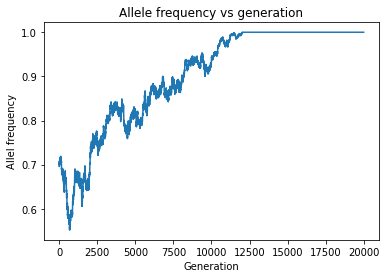

In [210]:
#simulation for one simulation 
import matplotlib.pyplot as plt
population = 1000
alle_freq = 0.7
generation = 20000

time = np.arange(0, generation, 1)

simu = simulation(generation,alle_freq,generation)

fig = plt.figure()
plt.plot(time, simu)
plt.ylabel("Allel frequency")
plt.xlabel("Generation")
plt.title("Allele frequency vs generation")



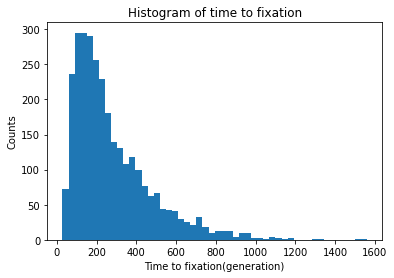

In [211]:
#simulation 3000 times to produce a histogram with density showing time to fixation over 3000 trials
import matplotlib.pyplot as plt
population = 100
alle_freq = 0.5
generation = 2000
simulation_time = 3000

fix = [] #alist to store generation to reach fixation
for simu in range(simulation_time):
    p_list = simulation (generation, alle_freq, population).tolist()
    if 1 in p_list:
        fix.append(p_list.index(1))
    elif 0 in p_list:
        fix.append(p_list.index(0))

import matplotlib.pyplot as plt
fig = plt.figure()
plt.hist(fix, bins=50)
plt.ylabel("Counts")
plt.xlabel("Time to fixation(generation)")
plt.title("Histogram of time to fixation")
plt.show()
    


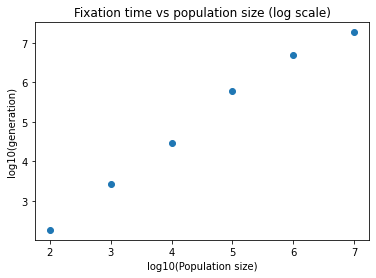

In [14]:
#Question4: simulation based on population size

alle_freq = 0.5
generation = 55000000
simulation_time = 100


pop_test = [100, 1000, 10000, 100000, 1000000, 10000000] # a list to store generations for simulation test
gen = np.zeros(len(pop_test))
for i in range(len(pop_test)):
    fix = []#alist to store generation to reach fixation for each population test
    for j in range(1):
        p_list = simulation (generation, alle_freq, pop_test[i]).tolist()
        if 1 in p_list:
            fix.append(p_list.index(1))
        elif 0 in p_list:
            fix.append(p_list.index(0))

    gen[i] = sum(fix)/len(fix) #store the average fixation time for each population size tested


import matplotlib.pyplot as plt


fig = plt.figure()
plt.scatter(np.log10(pop_test), np.log10(gen))
plt.ylabel("log10(generation)")
plt.xlabel("log10(Population size)")
plt.title("Fixation time vs population size (log scale)")
plt.show()

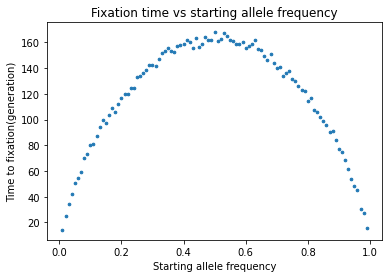

In [11]:
#Question 5: Simulate the time to fixation under a range of different starting allele frequencies
population = 100
generation = 300
simulation_time = 1000

gen = []
freq = 0.01
while freq < 1.00:
    fix = []
    for i in range(simulation_time):
        p_list = simulation (generation, freq, population).tolist()
        if 1 in p_list:
            fix.append(p_list.index(1))
        elif 0 in p_list:
            fix.append(p_list.index(0))
    gen.append(sum(fix)/len(fix))
    freq += 0.01

time = np.arange(0.01, 1.00, 0.01)
fig = plt.figure()
plt.scatter(time, gen, s = 7)
plt.ylabel("Time to fixation(generation)")
plt.xlabel("Starting allele frequency")
plt.title("Fixation time vs starting allele frequency")
plt.show()



### Question 6

In [4]:

#define a function that bases on Wright Fisher model with selection
def wf_selection(IniAlleleFreq, population, sel_coeff):
    numAllele = IniAlleleFreq * population * 2 #the number of alleles should have two copies
    N = 2 * population
    new_alleleFreq = numAllele * (1+ sel_coeff)/ (N - numAllele + numAllele * (1+sel_coeff)) 
    p = random.binomial(N, new_alleleFreq) / N
    return p

#def simulator with selection
def simulation_sel (generation, alle_freq, population, sel_coeff): 
    p_list = np.zeros(generation) #initziate a list of transition probability
    p_list[0] = alle_freq
    
    for gen in range (1,generation):
        p_list[gen] = wf_selection(p_list[gen-1], population, sel_coeff)
    
    return(p_list)

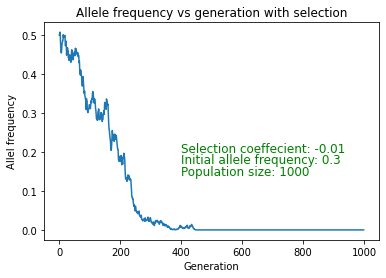

In [262]:
import matplotlib.pyplot as plt
population = 1000
alle_freq = 0.5
generation = 1000
sel_coeff = -0.01

time = np.arange(0, generation, 1)

simu = simulation_sel(generation,alle_freq,generation, sel_coeff)

fig = plt.figure()
plt.plot(time, simu)
plt.ylabel("Allel frequency")
plt.xlabel("Generation")
plt.title("Allele frequency vs generation with selection")
plt.text(400, 0.2, 'Selection coeffecient: -0.01', size=12, color='green')
plt.text(400, 0.17, 'Initial allele frequency: 0.5', size=12, color='green')
plt.text(400, 0.14, 'Population size: 1000', size=12, color='green')


plt.show()

In [5]:
# selection coefficient vs time to fixation for a fixed pop

import matplotlib.pyplot as plt
population = 100
alle_freq = 0.5
generation = 1000
simulation_time = 100

gen = []
sel = - 0.99
while sel < 1.00:
    fix = []
    for i in range(simulation_time):
        p_list = simulation_sel(generation, alle_freq, population, sel).tolist()
        if 1 in p_list:
            fix.append(p_list.index(1))
        elif 0 in p_list:
            fix.append(p_list.index(0))
    gen.append(sum(fix)/len(fix))
    sel += 0.03

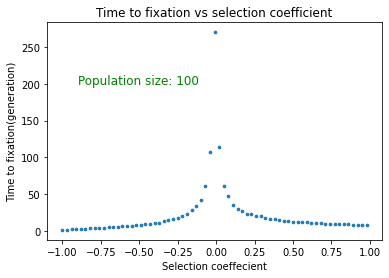

In [10]:
sel_coeff = np.arange(-1,1.01,0.03)

import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(sel_coeff, gen, s = 7)
plt.ylabel("Time to fixation(generation)")
plt.xlabel("Selection coeffecient")
plt.title("Time to fixation vs selection coefficient")
plt.text(-0.9, 200, 'Population size: 100', size=12, color='green')


plt.show()